## 교차검증 
* 데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 않음
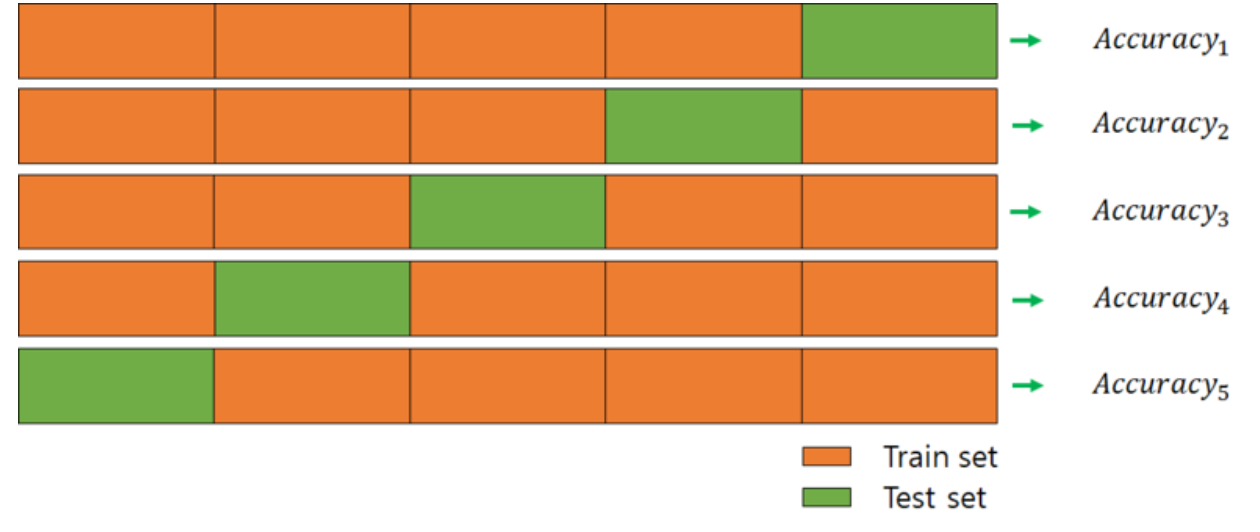

#### 장점 : 

1. 모든 데이터 셋을 평가에 활용할 수 있다.

  - 평가에 사용되는 데이터 편중을 막을 수 있다. 

   (특정 평가 데이터 셋에 overfit 되는 것을 방지할 수 있다.)

  - 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다. 

2. 모든 데이터 셋을 훈련에 활용할 수 있다.

  - 정확도를 향상시킬 수 있다.

  - 데이터 부족으로 인한 underfitting을 방지할 수 있다.

#### 단점 : Iteration 횟수가 많기 때문에 모델 훈련/평가 시간이 오래 걸린다.

## 교차검증_iris

### 1)라이브러리

In [25]:
#사이킷런에서 붓꽃 데이터를 가져옴
from sklearn.datasets import load_iris
# 의사 결정 나무 모델을 가져옴
from sklearn.tree import DecisionTreeClassifier
# cross_val_score()함수 : k-fold교차검증을 쉽게 사용하기 위한 함수 
from sklearn.model_selection import KFold, cross_val_score

### 2) 데이터 가져오기

In [26]:
iris=load_iris()

In [27]:
print("데이터의 크기",len(iris.data))

데이터의 크기 150


In [28]:
#붓꽃 데이터의 키들을 출력 
print("붓꽃 데이터의 키 ",iris.keys())

붓꽃 데이터의 키  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [29]:
print("붓꽃 데이터 target ",iris.target)

붓꽃 데이터 target  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 3)모델 생성

In [30]:
# 의사결정 나무 모델을 생성
dt=DecisionTreeClassifier()

### 4)분할 파라미터 설정

In [31]:
# n_splits: 데이터를 분할할 수있습니다. 전체 데이터 수를 넘을수 없습니다
# shuffle: 매번 데이터를 분할하기전에 섞을지 말지 여부를 선택
kfold=KFold(n_splits=20, shuffle=True)

### 5)교차 검증 실행
* cross_val_score 는 여러 파라미터를 받습니다
    - 첫번째는 모델 
    - 두번째는 feature
    - 세번째는 target
    - cv 는 분할 설정값
    - scoring은 평가 방법

In [32]:
score=cross_val_score(dt,iris.data,iris.target,cv=kfold,scoring="accuracy")

In [33]:
print(score.mean())

0.9607142857142857


## iris_k분할 교차검증_2

### k 분할 교차 검증
1. 집합 x를 a,b,c로분할
2. a를 테스트 전용, 나머지 b,c는 훈련데이터, 정밀도 s1
3. b를 테스트 전용 ,나머지 a,c는 훈련데이터, 정밀도 s2
4. c를 테스트 전용, 나머지 a,b는 훈련데이터 ,정밀도 s3
5. 분류 정밀도는 s1,s2,s3의 평균을 구해 최종적인 분류 정밀도를 구함 

In [34]:
import pandas as pd
from sklearn import svm, metrics, model_selection

In [35]:
csv=pd.read_csv("iris1.csv")

In [36]:
#csv

In [37]:
data=csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

In [38]:
label=csv["Name"]

크로스벨리데이션 하기

In [39]:
clf=svm.SVC()

In [40]:
score=model_selection.cross_val_score(clf,data,label,cv=5)

C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [41]:
print(score)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


In [42]:
print(score.mean())

0.9800000000000001
